<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/RBM_Collaborative_filtering_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 100kB/s 
     |████████████████████████████████| 1.7MB 42.6MB/s 
     |████████████████████████████████| 890kB 36.5MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=39da8e07e137923d9ccca6e0a5c215c259ced0b4bdee13201be6931b9d2a4247
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [1]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_details.csv to hotel_details.csv


In [3]:
import io
hotel_data = pd.read_csv(io.BytesIO(uploaded['hotel_details.csv']))

In [4]:
hotel_data.head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category
0,0,La Quinta,5820 Walden Rd,Beaumont,NaN,NaN,"Lodging,Motels,Hotels,Meeting & Event Planning..."
1,1,The Point,Po Box 1327,Saranac Lake,NaN,NaN,"Hotels,Hotel,Restaurants"
2,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels"
3,3,Economy Inn,1223 Radford Blvd,Dillon,2.0,Rs.4694,Hotels
4,4,Holiday Inn Express & Suites Lenoir City (knox...,1112 Highway 321 N,Lenoir City,2.0,Rs.6146,"Banquet Rooms,Reception Centers,Lodging,Hotels..."


In [5]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [6]:
import io
rating_data = pd.read_csv(io.BytesIO(uploaded['ratings.csv']))

In [7]:
rating_data.head()

,User_id,Hotel_id,Rating
0,15400,0,1.0
1,3702,1,5.0
2,3738,1,5.0
3,4593,1,5.0
4,4657,1,2.0


In [15]:
# Checking for missing values
pd.isnull(hotel_data).any()

Hotel_id          False
Hotel             False
Address           False
City              False
Hotel_Type         True
Price              True
Hotel_Category    False
List Index        False
dtype: bool

In [16]:
hotel_data = hotel_data.dropna()
hotel_data = hotel_data.reset_index(drop=True)
print('Shape of dataset ',hotel_data.shape)
print(hotel_data.columns)

Shape of dataset  (1593, 8)
Index(['Hotel_id', 'Hotel', 'Address', 'City', 'Hotel_Type', 'Price',
       'Hotel_Category', 'List Index'],
      dtype='object')


In [17]:
# Checking for missing values
pd.isnull(rating_data).any()

User_id     False
Hotel_id    False
Rating       True
dtype: bool

In [18]:
rating_data = rating_data.dropna()
rating_data = rating_data.reset_index(drop=True)
print('Shape of dataset ',rating_data.shape)
print(rating_data.columns)

Shape of dataset  (24151, 3)
Index(['User_id', 'Hotel_id', 'Rating'], dtype='object')


In [20]:
len(hotel_data)


1593

In [21]:
hotel_data.tail()


,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index
1588,3126,Sheraton Mission Valley San Diego Hotel,1433 Camino Del Rio South,San Diego,3.0,Rs.9373,Hotels,3126
1589,3127,Holiday Inn Canyon De Chelly,Bia Route 7 Garcia Trading Post,Chinle,3.0,Rs.7196,Hotels,3127
1590,3128,Polynesian Plaza,2131 Kalakaua Ave,Honolulu,2.0,Rs.17718,"Vacation Rentals,Resorts & Vacation Cottages,V...",3128
1591,3129,Quality Inn,2120 Jameson Pl S W,Decatur,2.0,Rs.7373,"Lodges,Hotels,Hotels & Motels,Lodging,Motels",3129
1592,3130,Quality Inn,12439 Northwest Fwy,Houston,2.0,Rs.7373,"Hotel & Motel Reservations,Hotels,Hotels & Mot...",3130


In [22]:
hotel_data['List Index'] = hotel_data.index
hotel_data.head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index
0,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0
1,3,Economy Inn,1223 Radford Blvd,Dillon,2.0,Rs.4694,Hotels,1
2,4,Holiday Inn Express & Suites Lenoir City (knox...,1112 Highway 321 N,Lenoir City,2.0,Rs.6146,"Banquet Rooms,Reception Centers,Lodging,Hotels...",2
3,5,Country Inn and Suites By Carlson Corbin,1888 Cumberland Falls Hwy,Corbin,2.0,Rs.4332,"Hotels,Family-Friendly Hotels,Budget Hotels,Ho...",3
4,6,Ambassadors Inn and Suites,716 21st St,Virginia Beach,2.0,Rs.4782,Hotels,4


In [23]:
#Merging movies_df with ratings_df by MovieID
merged_data = hotel_data.merge(rating_data, on='Hotel_id')

#Displaying the result
merged_data.head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,User_id,Rating
0,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,710,2.0
1,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,710,1.0
2,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,710,2.0
3,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,710,3.0
4,2,Inn At Queen Anne,505 1st Ave N,Seattle,2.0,Rs.8457,"hotel,Hotels",0,710,3.0


In [24]:
#Group up by UserID
userGroup = merged_data.groupby('User_id')
userGroup.first().head()

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,Rating
User_id,,,,,,,,,
0,3020,Regenta Place By Royal Orchid Hotel,"11, Park Road, Near Indian Express Near Indian...",Bengaluru,4.0,Rs.1103,Hotels,1486,5.0
1,3099,Shangri-La Hotel Bengaluru,"Palace Road, Bengaluru 560052 India",Bengaluru,5.0,Rs.9529,"Hotels,Luxury",1563,5.0
2,3046,Radisson Bengaluru City Center,"2 Gangadhar Chetty Road Ulsoor, Bengaluru 5600...",Bengaluru,4.0,Rs.4361,Hotels,1512,5.0
4,2189,Metro Points Hotel-Washington North,8500 Annapolis Rd,Hyattsville,3.0,Rs.5442,"Hotels,Hotel",1074,5.0
5,1607,Best Western Plus Kelly Inn Suites,4915 Southgate Dr,Billings,3.0,Rs.7474,"Hotels,Lodging,Hotels Motels,Family-friendly H...",819,4.0


In [25]:
#Amount of users used for training
amountOfUsedUsers = 1000
#Creating the training list
trX = []
#For each user in the group
for userID, curUser in userGroup:
    #Create a temp that stores every movie's rating
    temp = [0]*len(hotel_data)
    #For each movie in curUser's movie list
    for num, hotel in curUser.iterrows():
        #Divide the rating by 5 and store it
        temp[hotel['List Index']] = hotel['Rating']/5.0
    #Now add the list of ratings into the training list
    trX.append(temp)
    #Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1

In [26]:
hiddenUnits = 20
visibleUnits = len(hotel_data)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique hotels
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

In [27]:
#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [28]:
#Learning rate
alpha = 1.0
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

In [29]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [30]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

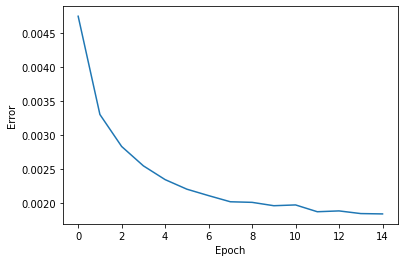

In [31]:
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_nb}))
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [32]:

#Selecting the input user
inputUser = [trX[75]]

In [33]:
#Feeding in the user and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

In [36]:
hotel_data["Recommendation Score"] = rec[0]
hotel_data.sort_values(["Recommendation Score"], ascending=False).head(20)

,Hotel_id,Hotel,Address,City,Hotel_Type,Price,Hotel_Category,List Index,Recommendation Score
7,9,Doubletree By Hilton West Palm Beach Airport,1808 S Australian Ave,West Palm Beach,3.0,Rs.7548,Hotels,7,0.023176
40,50,Renaissance Atlanta Waverly Hotel & Convention...,2450 Galleria Parkway,Atlanta,4.0,Rs.10743,"Wedding Sites,Hotels Motels,Hotel",40,0.014215
32,38,Doubletree By Hilton Hotel Bay City - Riverfront,1 Wenonah Park Pl,Bay City,3.0,Rs.7345,"Conventions Conferences & Trade Shows,Wedding ...",32,0.010765
337,656,Hyatt House Seattle/Downtown,201 5th Ave N,Seattle,3.0,Rs.8667,"Hotels and motels,Hotel South Lake Union,Hotel",337,0.010400
888,1775,Conrad Chicago,101 E Erie St,Chicago,5.0,Rs.16749,"Hotels,Hotels and motels,Resorts,Lodging,Motel...",888,0.010230
949,1910,"St. James Hotel, an Ascend Hotel Collection Me...",330 Magazine St,New Orleans,3.0,Rs.7248,"Hotels,Lodging,Hotel",949,0.009277
158,334,Best Western Plus Hacienda Hotel Old Town,4041 Harney St,San Diego,3.0,Rs.11649,"Corporate Housing,Lodging,Hotels Motels,Hotel",158,0.008674
334,653,Hampton Inn & Suites Orlando at SeaWorld,7003 Sea Harbor Dr,Orlando,3.0,Rs.4935,"Hotels,Corporate Lodging,Lodging,Hotel",334,0.008638
750,1462,ARIA Resort Casino,3730 Las Vegas Blvd S,Las Vegas,5.0,Rs.12226,"Hotels,Casinos,Resorts,Resort,Casino,Hotel",750,0.008067
5,7,Residence Inn By Marriott Irvine John Wayne Ai...,2855 Main St,Irvine,3.0,Rs.10120,Hotels,5,0.007833
